# Student Information
Name: Pheiroijam Prishika

Student ID:112062891

GitHub ID:Ph-Prishika

Kaggle name:Prishika_896

Kaggle private scoreboard snapshot: <img src='pics/pic0.png.PNG' /> <img src='pics/pic00.png.PNG' />

In [32]:
import pandas as pd

anger_train = pd.read_csv("C:/Users/picik/emo/anger-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("C:/Users/picik/emo/fear-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("C:/Users/picik/emo/joy-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("C:/Users/picik/emo/sadness-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [33]:
print("Shape of anger ", anger_train.shape)
print("Shape of sadness ", sadness_train.shape)
print("Shape of fear ", fear_train.shape)
print("Shape of joy ", joy_train.shape)

Shape of anger  (857, 4)
Shape of sadness  (1147, 4)
Shape of fear  (823, 4)
Shape of joy  (786, 4)


In [34]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [35]:
### testing data
anger_test = pd.read_csv("C:/Users/picik/emo/test_with/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("C:/Users/picik/emo/test_with/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("C:/Users/picik/emo/test_with/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("C:/Users/picik/emo/test_with/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [36]:
print("Shape of anger_test", anger_train.shape)
print("Shape of sadness_test", anger_train.shape)
print("Shape of fear_test", anger_train.shape)
print("Shape of joy_test", anger_train.shape)

Shape of anger_test (857, 4)
Shape of sadness_test (857, 4)
Shape of fear_test (857, 4)
Shape of joy_test (857, 4)


In [37]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [38]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


##** >>> Exercise 1 (Take home): **

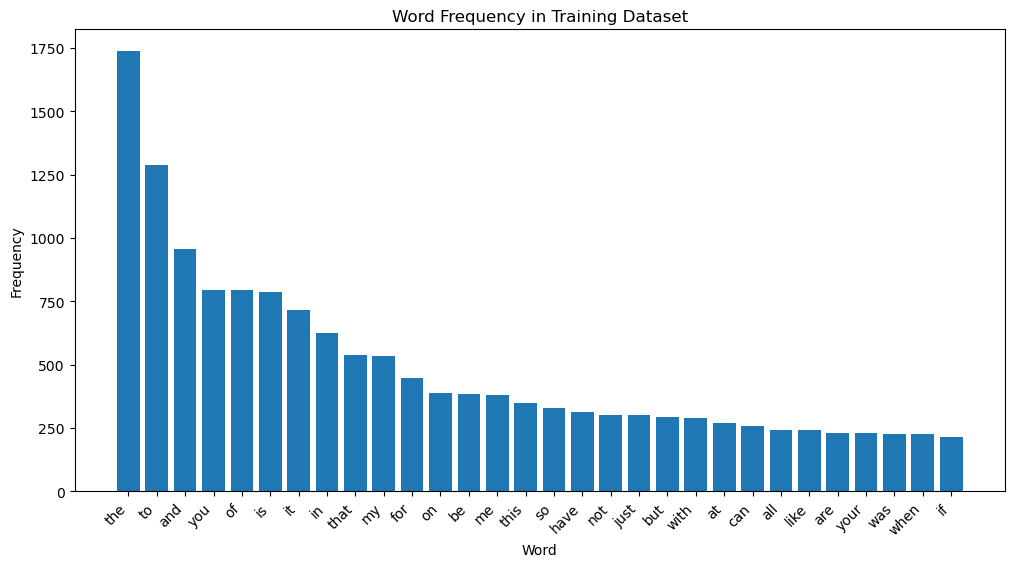

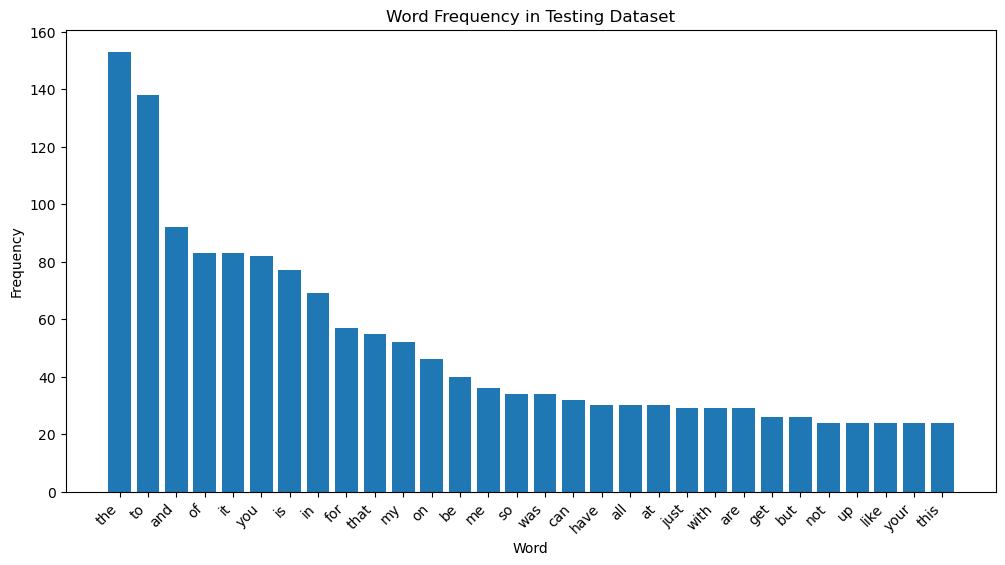

In [39]:
##** >>> Exercise 1 (Take home): **
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Function to plot word frequency
def plot_word_frequency(data, title):
    # Create a CountVectorizer to convert text data to word frequencies
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data['text'])

    # Sum the word frequencies
    word_frequencies = X.sum(axis=0)

    # Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame to store word frequencies and their corresponding words
    word_freq_df = pd.DataFrame(list(zip(feature_names, word_frequencies.flat)), columns=['Word', 'Frequency'])

    # Sort DataFrame by word frequency in descending order
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

    # Plot the top 30 words
    plt.figure(figsize=(12, 6))
    plt.bar(word_freq_df['Word'][:30], word_freq_df['Frequency'][:30])
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot word frequency for the top 30 words in the training dataset
plot_word_frequency(train_df, 'Word Frequency in Training Dataset')

# Plot word frequency for the top 30 words in the testing dataset
plot_word_frequency(test_df, 'Word Frequency in Testing Dataset')

In [40]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [41]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [42]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

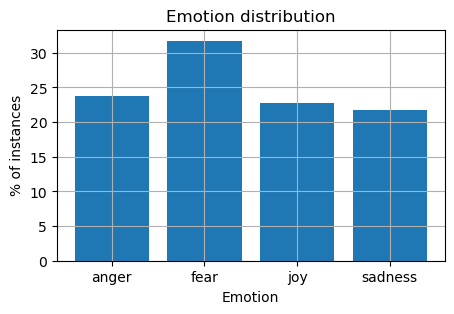

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [44]:
from sklearn.feature_extraction.text import CountVectorizer


In [45]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [46]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [47]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [48]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [49]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [51]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [52]:
"😂" in feature_names

False

In [53]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\picik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
vectorizer = CountVectorizer(tokenizer=None, token_pattern=r'\b\w+\b')


In [55]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\picik\anaconda3\envs\datamining\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [56]:
train_data_BOW_features_500.toarray()

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [58]:
"😂" in feature_names_500


True

##Home Work 2

In [59]:
##Home Work 2
from sklearn.feature_extraction.text import TfidfVectorizer

# Build analyzer (TF-IDF)
TFIDF_vectorizer = TfidfVectorizer(max_features=1000)

# Learn vocabulary dictionary and inverse document frequency from training data
TFIDF_vectorizer.fit(train_df['text'])

# Transform training and testing data to TF-IDF features
train_data_TFIDF_features = TFIDF_vectorizer.transform(train_df['text'])
test_data_TFIDF_features = TFIDF_vectorizer.transform(test_df['text'])

# Check the dimension
print("Training TF-IDF features shape:", train_data_TFIDF_features.shape)

# Observe some feature names
feature_names_TFIDF = TFIDF_vectorizer.get_feature_names_out()
print("Feature names [100:110]:", feature_names_TFIDF[100:110])


Training TF-IDF features shape: (3613, 1000)
Feature names [100:110]: ['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


In [60]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [61]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'joy', 'anger', 'sadness', 'joy', 'anger', 'joy', 'fear',
       'fear', 'fear'], dtype=object)

In [62]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [63]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [64]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [65]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

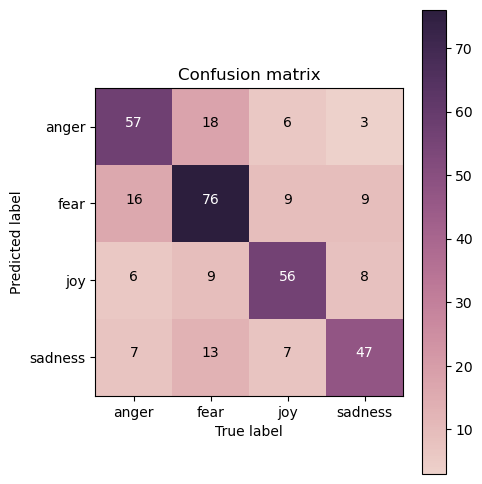

In [66]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

##HOME WORK 3#
The above result is the confusion matrix of the model. The matrix 


Row 1 (anger):
The true label for 57 instances of the "anger" class was correctly predicted as "anger."
18 instances of "anger" were incorrectly predicted as "fear."
6 instances of "anger" were incorrectly predicted as "joy."
3 instances of "anger" were incorrectly predicted as "sadness."


Row 2 (fear):
The true label for 76 instances of the "fear" class was correctly predicted as "fear."
16 instances of "fear" were incorrectly predicted as "anger."
9 instances of "fear" were incorrectly predicted as "joy."
9 instances of "fear" were incorrectly predicted as "sadness."


Row 3 (joy):
The true label for 56 instances of the "joy" class was correctly predicted as "joy."
6 instances of "joy" were incorrectly predicted as "anger."
9 instances of "joy" were incorrectly predicted as "fear."
8 instances of "joy" were incorrectly predicted as "sadness."


Row 4 (sadness):
The true label for 47 instances of the "sadness" class was correctly predicted as "sadness."
7 instances of "sadness" were incorrectly predicted as "anger."
13 instances of "sadness" were incorrectly predicted as "fear."
7 instances of "sadness" were incorrectly predicted as "joy."

###HOME WORK 4

In [68]:
###HOME WORK 4
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Build TF-IDF Vectorizer with 1000 features
TFIDF_vectorizer = TfidfVectorizer(max_features=1000)
TFIDF_vectorizer.fit(train_df['text'])

# 2. Transform training and testing data to TF-IDF features
X_train_tfidf = TFIDF_vectorizer.transform(train_df['text'])
X_test_tfidf = TFIDF_vectorizer.transform(test_df['text'])

# 3. Build Multinomial Naive Bayes model
NB_model = MultinomialNB()

# 4. Train the model
NB_model.fit(X_train_tfidf, train_df['emotion'])

# 5. Predict on training and testing data
y_train_pred_NB = NB_model.predict(X_train_tfidf)
y_test_pred_NB = NB_model.predict(X_test_tfidf)

# 6. Evaluate the model
# Accuracy
acc_train_NB = accuracy_score(y_true=train_df['emotion'], y_pred=y_train_pred_NB)
acc_test_NB = accuracy_score(y_true=test_df['emotion'], y_pred=y_test_pred_NB)

print('Training accuracy (Naive Bayes): {:.2f}'.format(acc_train_NB))
print('Testing accuracy (Naive Bayes): {:.2f}'.format(acc_test_NB))

# Classification Report
print('\nClassification Report (Naive Bayes):\n', classification_report(test_df['emotion'], y_test_pred_NB))

# Confusion Matrix
cm_NB = confusion_matrix(test_df['emotion'], y_test_pred_NB)
print('\nConfusion Matrix (Naive Bayes):\n', cm_NB)


Training accuracy (Naive Bayes): 0.87
Testing accuracy (Naive Bayes): 0.77

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

       anger       0.79      0.71      0.75        84
        fear       0.68      0.91      0.78       110
         joy       0.87      0.75      0.80        79
     sadness       0.85      0.64      0.73        74

    accuracy                           0.77       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.77      0.77       347


Confusion Matrix (Naive Bayes):
 [[ 60  14   6   4]
 [  8 100   1   1]
 [  5  12  59   3]
 [  3  22   2  47]]


In [ ]:
###HOME WORK 5
Naive Bayes Model:
Training Accuracy (Naive Bayes): 87%
Testing Accuracy (Naive Bayes): 77%

Decision Tree Model:
Training Accuracy (Decision Tree): 99%
Testing Accuracy (Decision Tree): 66%


Comparison and Interpretation:

Accuracy:
Naive Bayes: 77%
Decision Tree: 66%
The Naive Bayes model performs better in terms of overall accuracy on the testing set.

Overfitting:
The Decision Tree model has a significantly higher training accuracy (99%) compared to its testing accuracy (66%), indicating potential overfitting. 
This means that the Decision Tree model may have memorized the training data and performs less well on unseen data.

Interpretation:
Naive Bayes is a probabilistic model based on Bayes theorem. It assumes independence between features, which may not hold true in all cases but often works well for text classification tasks.
Decision Trees create complex decision boundaries and can capture intricate relationships in the data.
However, they are prone to overfitting, especially when the depth of the tree is not controlled.

Trade-off:
Naive Bayes provides a simpler and computationally efficient approach, especially for text data, where the independence assumption may not be a significant drawback.
Decision Trees offer more flexibility and can capture complex patterns, but they require careful tuning to avoid overfitting.


Naive Bayes model outperforms the Decision Tree model in terms of accuracy on the provided testing set while the later suffers from overfitting.
The Naive Bayes models probabilistic approach is well-suited for text classification, and its performance on unseen data is more balanced compared to the Decision Tree model, which exhibits signs of overfitting.

##Extra Model using Word2vec with Naive Bayes as classifier

In [73]:
##Extra Model using Word2vec with Naive Bayes as classifier
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the training dataset
anger_train = pd.read_csv("C:/Users/picik/emo/anger-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("C:/Users/picik/emo/sadness-ratings-0to1.train.txt",
                           sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("C:/Users/picik/emo/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("C:/Users/picik/emo/joy-ratings-0to1.train.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# Combine 4 sub-datasets
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

# Load the testing dataset
anger_test = pd.read_csv("C:/Users/picik/emo/test_with/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("C:/Users/picik/emo/test_with/sadness-ratings-0to1.dev.gold.txt",
                           sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("C:/Users/picik/emo/test_with/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("C:/Users/picik/emo/test_with/joy-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# Combine 4 sub-datasets
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# Preprocess Text Data
nltk.download('punkt')

def preprocess_text(text):
    tokens = word_tokenize(text)
    return ' '.join(tokens)

train_df['preprocessed_text'] = train_df['text'].apply(preprocess_text)
test_df['preprocessed_text'] = test_df['text'].apply(preprocess_text)

# Vectorize text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(train_df['preprocessed_text'])
X_test_count = vectorizer.transform(test_df['preprocessed_text'])

# Target labels
y_train = train_df['emotion']
y_test = test_df['emotion']

# Train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_count, y_train)

# Predictions
y_train_pred_nb = nb_model.predict(X_train_count)
y_test_pred_nb = nb_model.predict(X_test_count)

# Evaluate the model
acc_train_nb = accuracy_score(y_train, y_train_pred_nb)
acc_test_nb = accuracy_score(y_test, y_test_pred_nb)

print('Training Accuracy (Naive Bayes): {:.2f}'.format(acc_train_nb))
print('Testing Accuracy (Naive Bayes): {:.2f}'.format(acc_test_nb))

# Classification Report
print(classification_report(y_test, y_test_pred_nb))

# Confusion Matrix
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test, y_test_pred_nb))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\picik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Training Accuracy (Naive Bayes): 0.97
Testing Accuracy (Naive Bayes): 0.77
              precision    recall  f1-score   support

       anger       0.80      0.73      0.76        84
        fear       0.69      0.85      0.76       110
         joy       0.91      0.73      0.81        79
     sadness       0.75      0.74      0.75        74

    accuracy                           0.77       347
   macro avg       0.79      0.76      0.77       347
weighted avg       0.78      0.77      0.77       347

Confusion Matrix (Naive Bayes):
 [[61 14  2  7]
 [ 8 93  1  8]
 [ 4 14 58  3]
 [ 3 13  3 55]]


Deep Learning

In [76]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [78]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 0    anger
1    anger
2    anger
3    anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [79]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [80]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

In [82]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('C:/Users/picik/emo/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 0s 2ms/step - loss: 1.0451 - accuracy: 0.6117 - val_loss: 0.9597 - val_accuracy: 0.6513
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.7744 - val_loss: 0.7996 - val_accuracy: 0.7003
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8397 - val_loss: 0.7817 - val_accuracy: 0.6772
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8796 - val_loss: 0.8082 - val_accuracy: 0.6744
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.9067 - val_loss: 0.8646 - val_accuracy: 0.6945
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.9289 - val_loss: 0.9055 - val_accuracy: 0.6945
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9391 - val_loss: 0.9444 - val_accuracy: 0.6801
Epoch 

In [83]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array([[3.4437593e-02, 2.8467076e-02, 9.1811645e-01, 1.8978801e-02],
       [9.9832731e-01, 1.6071731e-03, 1.6246461e-06, 6.3799474e-05],
       [9.6415567e-01, 3.0072629e-02, 3.7996159e-08, 5.7716556e-03],
       [9.5138288e-01, 1.0885533e-04, 3.2744966e-02, 1.5763091e-02],
       [4.5690695e-03, 9.7513181e-01, 3.7089630e-05, 2.0262040e-02]],
      dtype=float32)

In [84]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'anger', 'anger', 'anger', 'fear'], dtype=object)

In [85]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [87]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("C:/Users/picik/emo/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.611680,1.045119,0.651297,0.959706
1,1,0.774426,0.612292,0.700288,0.799563
2,2,0.839745,0.424587,0.677233,0.781701
3,3,0.879601,0.332527,0.674352,0.808169
4,4,0.906726,0.266428,0.694524,0.864607
5,5,0.928868,0.216787,0.694524,0.905515
6,6,0.939109,0.184690,0.680115,0.944432
7,7,0.953224,0.153779,0.691643,1.026662
8,8,0.960144,0.133066,0.688761,1.059349
9,9,0.965679,0.118039,0.682997,1.088436


##HOME WORK 6

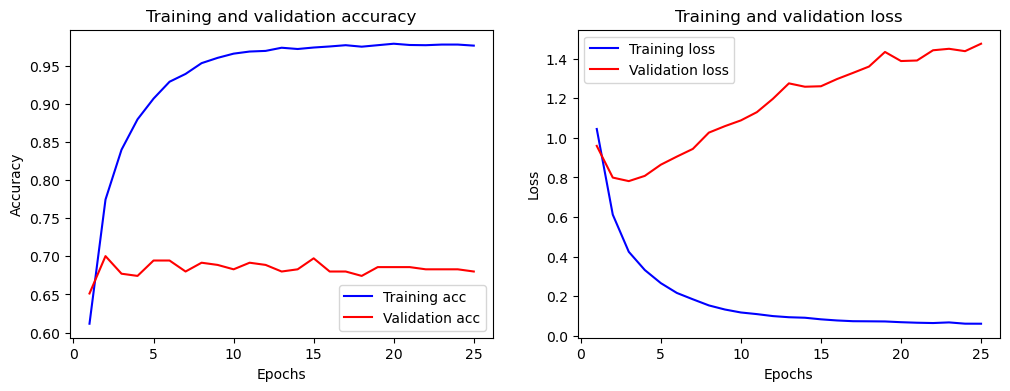

In [88]:
##HOME WORK 6
import matplotlib.pyplot as plt

# Extracting training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


##HOME WORK 2 Continue
the two subplots: one for accuracy and another for loss. The blue lines represent the training set, and the red lines represent the validation set.

Interpretation:

Accuracy Plot: It shows how well the model is learning over epochs.
    If training accuracy increases while validation accuracy remains stagnant or decreases, it might be a sign of overfitting, where the model is fitting too closely to the training data.

Loss Plot: It shows how well the model is minimizing its error during training and validation. 
    A decreasing training loss is expected, but if validation loss starts increasing while training loss keeps decreasing, it may indicate overfitting.

Overfitting/Underfitting:

Overfitting: This occurs when the model performs well on the training set but poorly on the validation set. 
    In the accuracy plot, you may see a large gap between the training and validation accuracy. 
    In the loss plot, the training loss continues to decrease, but the validation loss starts to increase.

Underfitting: This occurs when the model doesn't learn well from the training set, resulting in low accuracy and high loss for both training and validation sets.

In your specific case, it looks like there might be some overfitting, as the training accuracy is increasing, but the validation accuracy is not improving significantly, and the validation loss is increasing. 
You might need to consider strategies to reduce overfitting, such as regularization or adjusting the model architecture.

In [91]:
pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.0 MB 3.6 MB/s eta 0:00:07
   - -------------------------------------- 0.7/24.0 MB 8.3 MB/s eta 0:00:03
   - -------------------------------------- 1.0/24.0 MB 11.1 MB/s eta 0:00:03
   - -------------------------------------- 1.0/24.0 MB 11.1 MB/s eta 0:00:03
   - -------------------------------------- 1.0/24.0 MB 11.1 MB/s eta 0:00:03
   - -------------------------------------- 1.0/24.0 MB 11.1 MB/s eta 0:00:03
   - -------------------------------------- 1.0/24.0 MB 11.1 MB/s eta 0:00:03
   --- ------------------------------------ 2.1/24.0 MB 5.7 MB/s eta 0:00:04
   ----- ---------------------------------- 3.0/24.0 MB 7.4 MB/s eta 0:00:03
   ------ --------------------------------- 4.1/24.0 MB 9.1 MB/s eta 0:00:03
   -------- ------------------------------- 5.3/24.0 MB 10.6 MB/s eta 0:00:02
   --------------- ------------------------ 9.1/24.0 MB 16.6 MB/s eta 0:00:01

In [92]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
0,10000,How the fu*k! Who the heck! moved my fridge!.....,"[How, the, fu, *, k, !, Who, the, heck, !, mov..."
1,10001,So my Indian Uber driver just called someone t...,"[So, my, Indian, Uber, driver, just, called, s..."
2,10002,@DPD_UK I asked for my parcel to be delivered ...,"[@, DPD_UK, I, asked, for, my, parcel, to, be,..."
3,10003,so ef whichever butt wipe pulled the fire alar...,"[so, ef, whichever, butt, wipe, pulled, the, f..."
4,10004,Don't join @BTCare they put the phone down on ...,"[Do, n't, join, @, BTCare, they, put, the, pho..."


In [93]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['How', 'the', 'fu', '*', 'k', '!', 'Who', 'the', 'heck', '!', 'moved', 'my', 'fridge', '!', '...', 'should', 'I', 'knock', 'the', 'landlord', 'door', '.', '#', 'angry', '#', 'mad', '#', '#']),
       list(['So', 'my', 'Indian', 'Uber', 'driver', 'just', 'called', 'someone', 'the', 'N', 'word', '.', 'If', 'I', 'was', "n't", 'in', 'a', 'moving', 'vehicle', 'I', "'d", 'have', 'jumped', 'out', '#', 'disgusted']),
       list(['@', 'DPD_UK', 'I', 'asked', 'for', 'my', 'parcel', 'to', 'be', 'delivered', 'to', 'a', 'pick', 'up', 'store', 'not', 'my', 'address', '#', 'fuming', '#', 'poorcustomerservice'])],
      dtype=object)

In [95]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [96]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.444028  ,  0.39195058, -0.10827123,  0.42123252, -0.19051228,
       -0.95007116,  0.6670616 ,  1.4457656 , -0.30568987, -0.30255064,
       -0.6558931 , -0.5688687 , -0.5686394 ,  0.28350446,  0.05102655,
       -0.25717506,  0.6537253 , -0.42133352,  0.2501249 , -1.2118628 ,
        0.46860087,  0.8810014 ,  0.69136405, -0.40695253, -0.01940935,
        0.56307846, -0.59577125,  0.16299526, -0.40682346,  0.34764975,
        0.06588694,  0.0569654 ,  0.73091865, -0.5546376 , -0.10929753,
        0.5076269 ,  0.30512553, -0.14657518, -0.7671512 , -0.08250272,
        0.2072049 , -0.37050033, -0.12019023,  0.08017329,  0.47376806,
       -0.34647596, -0.61762613, -0.27547988,  0.51080656, -0.16500749,
       -0.04796204, -0.2601364 , -0.24148044, -0.01782642, -0.66078097,
        0.11771303,  0.11307068,  0.05110788,  0.04547747, -0.09526108,
        0.25155303, -0.41108763,  0.70048934,  0.49731517, -0.6386967 ,
        0.5975028 ,  0.44192973,  0.6177118 , -1.3226668 ,  0.70

In [97]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('cats', 0.917853593826294),
 ('Really', 0.9167478084564209),
 ('Be', 0.9166775345802307),
 ('Kik', 0.9159184098243713),
 ('help', 0.9139007925987244),
 ('birthday', 0.9131966233253479),
 ('O', 0.9129994511604309),
 ('abscess', 0.9081231951713562),
 ('depress', 0.9044948816299438),
 ('free', 0.9026293754577637)]

In [99]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "D:/Prishika/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

In [100]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[===========---------------------------------------] 23.1% 24.2/104.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 45.5% 47.6/104.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================================------------] 78.0% 81.7/104.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.917618453502655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

In [101]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

##HOME WORK 7##

To represent a sentence using word vectors, you can use different aggregation techniques.
One common approach is to take the average or weighted average of the word vectors in the sentence 
to create a single vector representation for the entire sentence. This aggregated vector can then be used 
as input to your machine learning model. Below are the example code

In [102]:
##HOME WORK 7
import numpy as np

def get_sentence_vector(words, model, vector_dim):
    # Filter words that are present in the Word2Vec model
    valid_words = [word for word in words if word in model.wv]
    
    if not valid_words:
        # If no valid words are present, return a zero vector
        return np.zeros(vector_dim)
    
    # Calculate the average of word vectors
    word_vectors = [model.wv[word] for word in valid_words]
    sentence_vector = np.mean(word_vectors, axis=0)
    
    return sentence_vector

# Example usage:
sentence = "I am feeling happy"
tokenized_sentence = nltk.word_tokenize(sentence.lower())  # Tokenize and lowercase the sentence
vector_dim = 100  # Assuming the vector dimensionality is 100 (adjust based on your Word2Vec model)
sentence_vector = get_sentence_vector(tokenized_sentence, word2vec_model, vector_dim)
print(sentence_vector)


[ 2.85962641e-01  5.42322397e-01 -3.58158574e-02  1.12163469e-01
  2.46809795e-03 -1.08690298e+00  4.31722403e-01  1.02320743e+00
 -6.37469172e-01 -4.61586714e-01 -6.03910267e-01 -9.61495876e-01
  1.35318369e-01  4.44071889e-01 -1.21781506e-01 -5.21884322e-01
  4.79625881e-01  3.26674357e-02  1.64330900e-01 -9.89675164e-01
  3.42683464e-01  2.27258176e-01  7.18118966e-01 -2.49889582e-01
 -1.48767680e-01  6.84486568e-01 -6.30115509e-01  2.18347371e-01
 -3.50080967e-01  4.85179007e-01  4.45439756e-01  1.52643546e-01
  3.19359362e-01 -7.53708899e-01  1.12652019e-01  5.16394079e-01
  2.07169622e-01 -1.52637243e-01 -5.31153858e-01 -4.69152182e-01
  2.51255482e-01 -1.00561333e+00  3.72244865e-02  5.08795857e-01
  5.71098626e-01 -3.30975711e-01 -3.85532439e-01 -7.55054832e-01
  3.67021441e-01 -4.16370600e-01  7.32615888e-01 -2.53924608e-01
 -1.43812537e-01 -2.95810223e-01 -7.69246757e-01  3.53842437e-01
  1.61777273e-01 -8.38261917e-02 -4.10218358e-01 -3.80609244e-01
  6.31419897e-01 -4.88612

In [103]:
####HOME WORK 7####

import numpy as np
import nltk
from gensim.models import Word2Vec
import pandas as pd

# Load the dataset
anger_train = pd.read_csv("C:/Users/picik/emo/anger-ratings-0to1.train.txt", sep="\t", header=None,
                         names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("C:/Users/picik/emo/sadness-ratings-0to1.train.txt", sep="\t", header=None,
                           names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("C:/Users/picik/emo/fear-ratings-0to1.train.txt", sep="\t", header=None,
                         names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("C:/Users/picik/emo/joy-ratings-0to1.train.txt", sep="\t", header=None,
                        names=["id", "text", "emotion", "intensity"])

# Combine 4 sub-datasets
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

# Tokenize the text
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x.lower()))

# Assuming you already have the Word2Vec model trained (as 'word2vec_model')
vector_dim = 100  # Assuming the vector dimensionality is 100 (adjust based on your Word2Vec model)

def get_sentence_vector(words, model, vector_dim):
    valid_words = [word for word in words if word in model.wv]
    
    if not valid_words:
        return np.zeros(vector_dim)
    
    word_vectors = [model.wv[word] for word in valid_words]
    sentence_vector = np.mean(word_vectors, axis=0)
    
    return sentence_vector

# Create sentence vectors for the training data
train_df['sentence_vector'] = train_df['text_tokenized'].apply(lambda x: get_sentence_vector(x, word2vec_model, vector_dim))

# Now, train your model using 'sentence_vector' as input features and 'emotion' as the target variable
# You can follow the rest of the code for model training and evaluation as you did before.


In [104]:
#####HOME WORK 7


# Display the first few rows of the dataframe
print(train_df[['text', 'emotion', 'sentence_vector']].head())

# Display the training logs
print(training_log)


                                                text emotion  \
0  How the fu*k! Who the heck! moved my fridge!.....   anger   
1  So my Indian Uber driver just called someone t...   anger   
2  @DPD_UK I asked for my parcel to be delivered ...   anger   
3  so ef whichever butt wipe pulled the fire alar...   anger   
4  Don't join @BTCare they put the phone down on ...   anger   

                                     sentence_vector  
0  [-0.22534122, 0.2441926, 0.12421109, 0.4978775...  
1  [0.13476409, 0.5061328, 0.29929054, 0.30050674...  
2  [0.01563104, 0.34072146, 0.18933472, 0.3628895...  
3  [-0.55938005, 0.24769682, 0.18300238, 0.578616...  
4  [0.082421795, 0.4369494, 0.31861383, 0.5450755...  
    epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.611680  1.045119      0.651297  0.959706
1       1  0.774426  0.612292      0.700288  0.799563
2       2  0.839745  0.424587      0.677233  0.781701
3       3  0.879601  0.332527      0.674352  0.808169
4       4  0.90

In [105]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [106]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


In [107]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [108]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [109]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


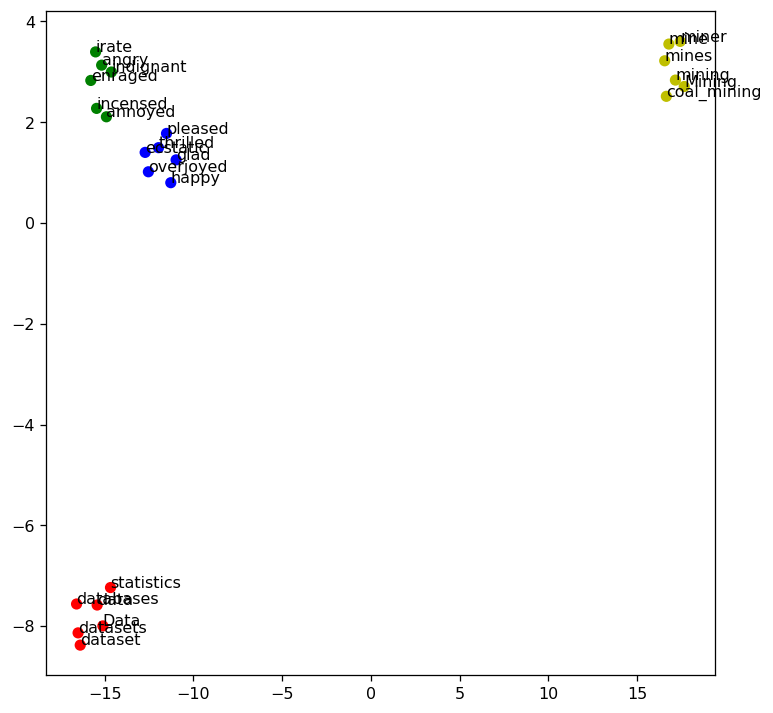

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

##HOME WORK 8##

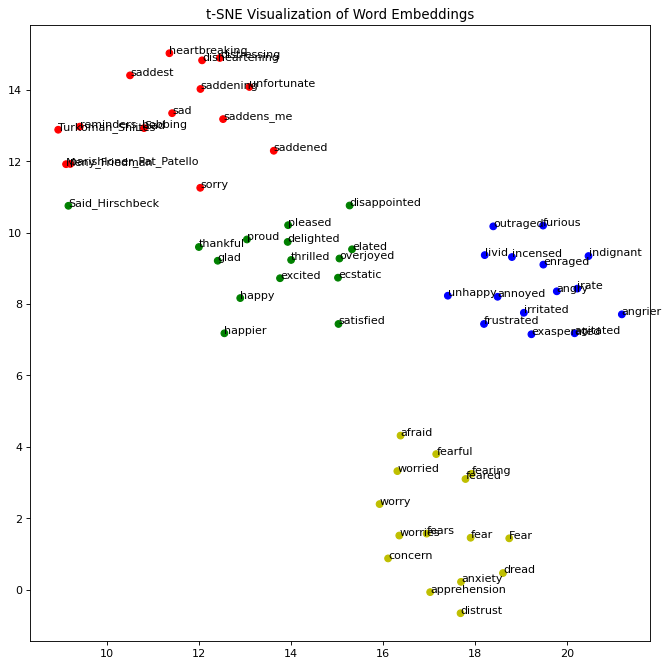

In [111]:
# Words to visualize
word_lists = {
    'angry': ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=14)],
    'happy': ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=14)],
    'sad': ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=14)],
    'fear': ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=14)],
}

# Combine all target words
target_words = sum(word_lists.values(), [])

# Assign colors
cn = 15
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

# Prepare training word vectors
size = 200
all_word = list(w2v_google_model.index_to_key)
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

# Training
X_tsne = tsne.fit_transform(X_train)

# Plot the result
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X_tsne[:60, 0], X_tsne[:60, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:60, 0], X_tsne[:60, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

plt.title("t-SNE Visualization of Word Embeddings")
plt.show()


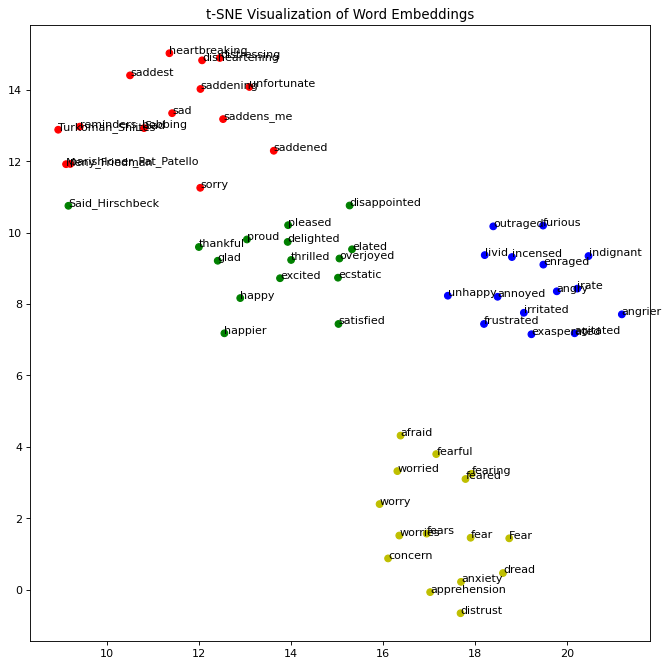

In [113]:
# Words to visualize
word_lists = {
    'angry': ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=14)],
    'happy': ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=14)],
    'sad': ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=14)],
    'fear': ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=14)],
}

# Combine all target words
target_words = sum(word_lists.values(), [])

# Assign colors
cn = 15
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

# Prepare training word vectors
size = 200
all_word = list(w2v_google_model.index_to_key)
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

# Training
X_tsne = tsne.fit_transform(X_train)

# Plot the result
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X_tsne[:60, 0], X_tsne[:60, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:60, 0], X_tsne[:60, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

plt.title("t-SNE Visualization of Word Embeddings")
plt.show()
